# Amazon Sales Data Analysis with Python

### Project Overview
This project analyzes a sample of Amazon sales transactions using Python tools such as **Pandas**, **NumPy**, **Matplotlib**, and **Seaborn**. 

Insights:
- Sales trends over time
- Revenue, cost, and profit analysis
- Regional and product-based performance
- Order priorities and sales channels


### Our Business Goal:
Provide a clear insights into product and regional performance to help optimize future sales strategies.

In [1]:
import pandas as pd                 # ← You missed this import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Styling for visuals
sns.set_style('whitegrid')       # Use Seaborn's style directly
sns.set_palette('pastel')        # Optional: pastel color theme


##  Load the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/sales-data-sample/sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


##  Data Overview and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
# Convert 'Order Date' to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Check for nulls
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

## Descriptive Statistics

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


## Revenue Trends Over Time

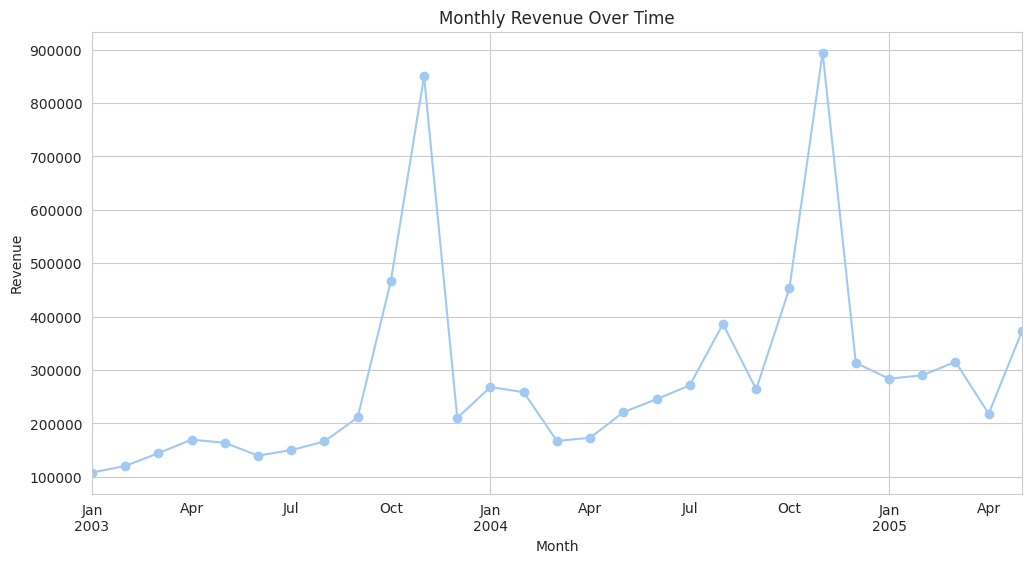

In [6]:
# Step 1: Create Total Revenue column
df['Total Revenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Step 2: Convert ORDERDATE to datetime if not already done
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Step 3: Group by month and sum revenue
monthly_revenue = df.groupby(df['ORDERDATE'].dt.to_period('M'))['Total Revenue'].sum()

# Step 4: Plot
monthly_revenue.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

## Top Regions by Revenue

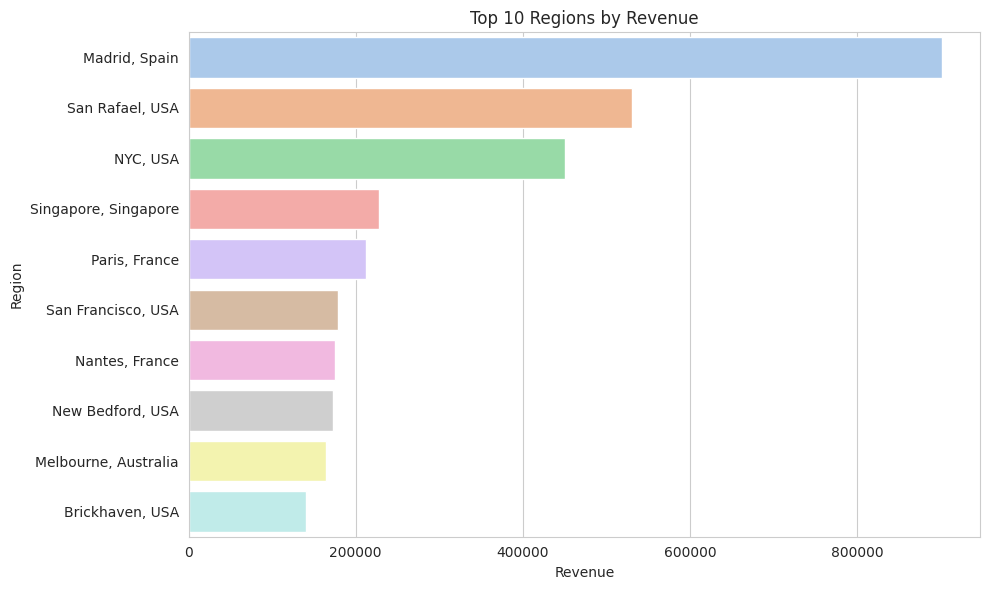

In [7]:
df['Region'] = df['CITY'] + ', ' + df['COUNTRY']
top_regions = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Top 10 Regions by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

## Top-Selling Products

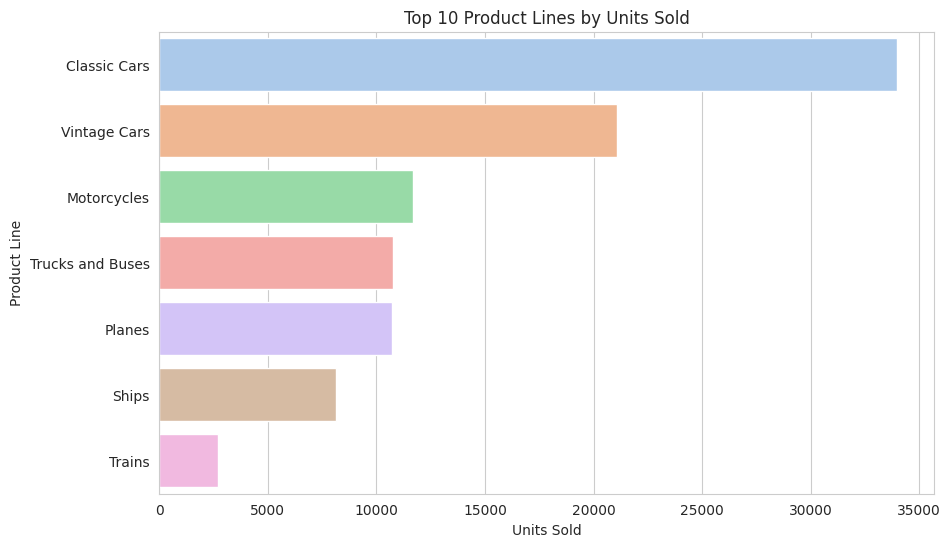

In [8]:
top_items = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title('Top 10 Product Lines by Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Product Line')
plt.show()


## Sales Channel Performance

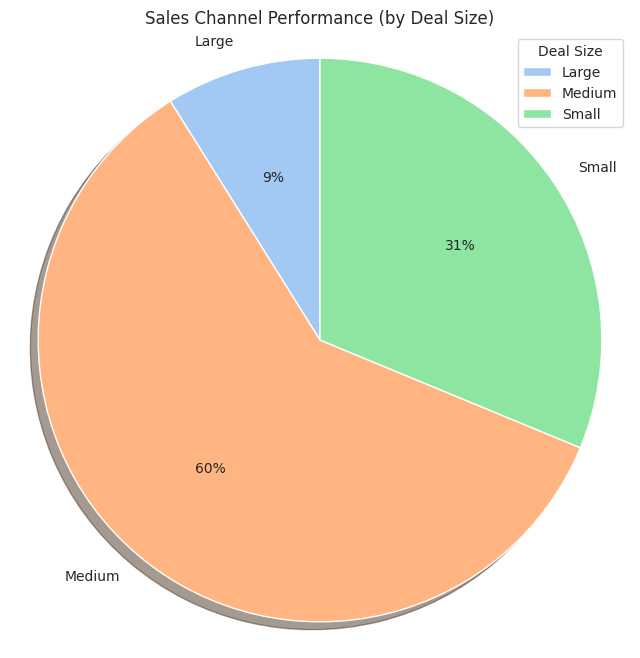

In [9]:
# Group by DEALSIZE and sum Revenue
channel_revenue = df.groupby('DEALSIZE')['Total Revenue'].sum()

# Pie chart of sales performance by 'DEALSIZE' (acting as sales channels)

channel_revenue = df.groupby('DEALSIZE')['Total Revenue'].sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(channel_revenue, labels=channel_revenue.index, autopct='%1.0f%%', startangle=90, shadow=True)
plt.title('Sales Channel Performance (by Deal Size)')
plt.legend(channel_revenue.index, title="Deal Size", loc="best")
plt.axis('equal')  # Keeps the pie chart circular
plt.show()


## Profit by Country

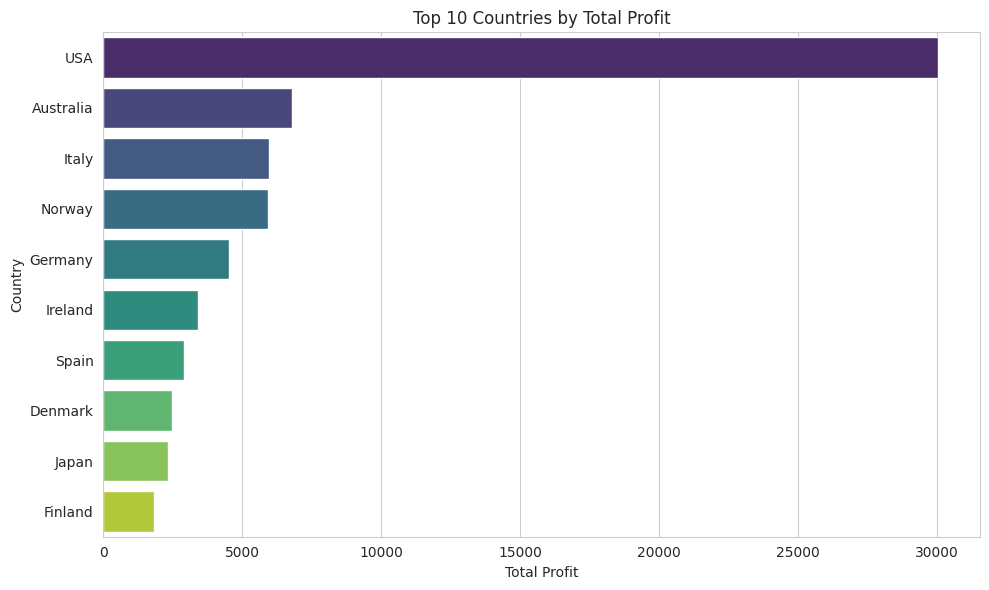

In [10]:
# Calculate Total Profit
df['Total Profit'] = df['SALES'] - (df['MSRP'] * df['QUANTITYORDERED'])

# Group by COUNTRY to get top 10 countries by profit
country_profit = df.groupby('COUNTRY')['Total Profit'].sum().sort_values(ascending=False).head(10)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=country_profit.values, y=country_profit.index, palette='viridis')
plt.title('Top 10 Countries by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## Business Insights

### Key Takeaways:
- **Revenue trends** show seasonal spikes — useful for planning promotions.
- **Top-performing regions** can be targeted for future campaigns.
- **Certain products** dominate sales — consider bundling or expanding those categories.
- **Sales channels** (online/offline) show different performance patterns — opportunity to optimize strategy.
- **Profit analysis** highlights which regions are not just selling, but delivering margin.

---
This notebook demonstrates how to use Python for business data analysis — using Pandas for data wrangling and Matplotlib/Seaborn for impactful storytelling.

Tools Used: **Pandas, Matplotlib, Seaborn, NumPy, Jupyter Notebook**